# Comparing data by week

In [1]:
import matplotlib.pylab as plt
import matplotlib as m

%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (14, 5)
plt.rcParams["figure.dpi"] = 600
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.size"] = 14
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
plt.rcParams.update({'figure.autolayout': True})
# plt.rcParams

In [3]:
def centered_95int(data):
    return 1.96 * (data.std() / np.sqrt(len(data)))

In [10]:
def compare_fpl_weeks(dfs, plot_output_dir):
    """
    dfs: list of dataframes with DateTime index
    """
    temp = pd.DataFrame()
    for df in dfs:
        _temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
            {"mean":"mean", "err":centered_95int}
        )
        temp = pd.concat([temp, _temp], axis=1)
    
    stds = temp.ix[:,1::2].rolling(window=3).mean()
    means = temp.ix[:,0::2].rolling(window=3).mean()

    num_weeks = len(means.columns)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for i in range(num_weeks):
        ax.plot(range(len(means)), means.ix[:, i], '-', label="week" + str(i+1))

    ax.set_xlim([0, 24*7])
    ax.set_xticks(range(0, 24*7, 24))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_title("comparison over week")
    ax.set_ylabel("Proportion of all tweets")
    ax.legend(loc="best")
    ax.grid()
#     plt.savefig(plot_output_dir + "reflecting_comparison.png")

In [5]:
import pickle

In [6]:
def setup(df):
    p = 0.75
    of_interest = df.predict_fpa > p

    df["first_person_alcohol"] = 0
    df["first_person_alcohol"][of_interest] = 1
    fp_cols = [ 'predict_present', 'predict_future', 'predict_past']
    new_fp_cols = ["casual", "looking", "reflecting"]
    for new_name, old_name in zip(new_fp_cols, fp_cols):
        df[new_name] = df[old_name] >0.6

Single labeled plots

In [ ]:
df_old1 = pickle.load(open('pickles/June_labeled_all.p', 'rb'))
df_old2 = pickle.load(open('pickles/June_drinking_labeled.p', 'rb'))
df_old = pd.concat([df_old1, df_old2])

setup(df_old)
# beginning of first day to end of last day
week1o = df_old['2015-06-01':'2015-06-07']
week2o = df_old['2015-06-08':'2015-06-14']
week3o = df_old['2015-06-015':'2015-06-21']
week4o = df_old['2015-06-022':'2015-06-28']
week5o = df_old['2015-06-29':]
weekso = [week1o, week2o, week4o]

casualo = [week1o['casual'], week2o['casual'], week4o['casual']]

lookingo = [week1o['looking'], week2o['looking'], week4o['looking']]

reflectingo = [week1o['reflecting'], week2o['reflecting'], week4o['reflecting']]
compare_fpl_weeks(casualo, '')
compare_fpl_weeks(lookingo, '')
compare_fpl_weeks(reflectingo, '')

# New plots

In [7]:
df_all = pickle.load(open('pickles/June_labeled_updated_fpl.p', 'rb'))

In [8]:
setup(df_all)
# beginning of first day to end of last day
week1 = df_all['2015-06-01':'2015-06-07']
week2 = df_all['2015-06-08':'2015-06-14']
week3 = df_all['2015-06-015':'2015-06-21']
week4 = df_all['2015-06-022':'2015-06-28']
week5 = df_all['2015-06-29':]
weeks = [week1, week2, week4]

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


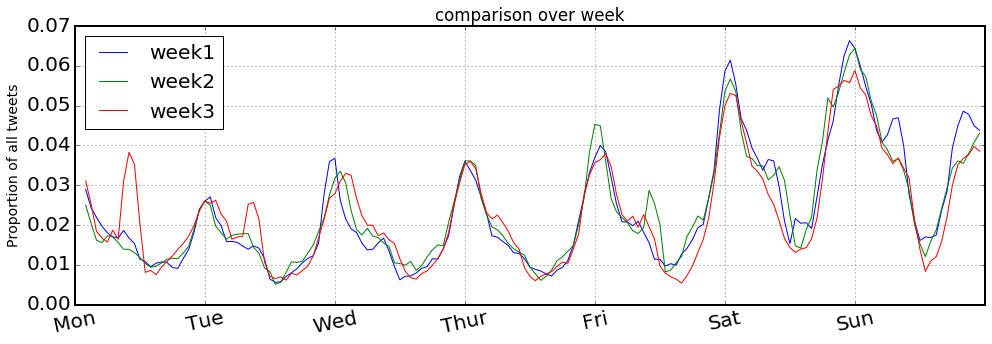

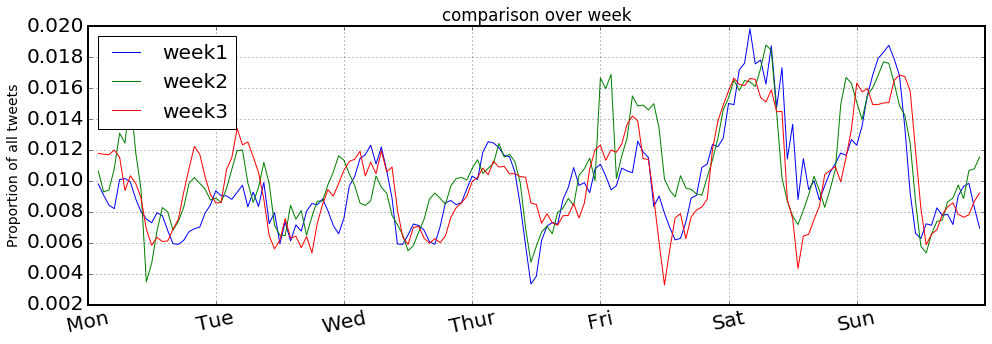

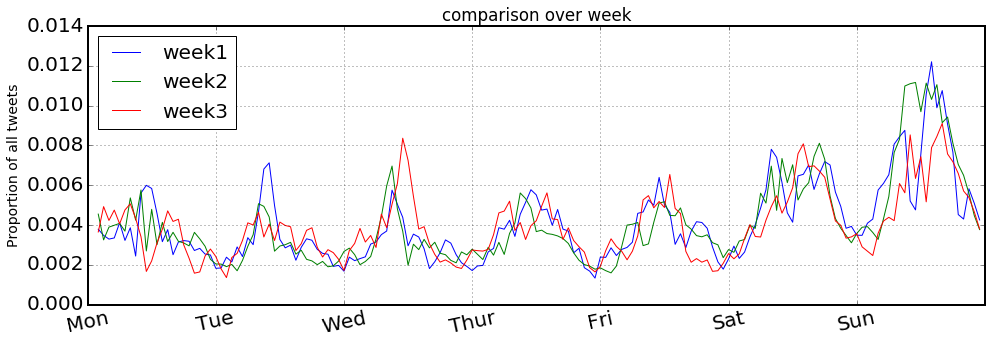

In [11]:
casual = [week1['casual'], week2['casual'], week4['casual']]
looking = [week1['looking'], week2['looking'], week4['looking']]
reflecting = [week1['reflecting'], week2['reflecting'], week4['reflecting']]
compare_fpl_weeks(casual, '')
compare_fpl_weeks(looking, '')
compare_fpl_weeks(reflecting, '')